### Primeiramente, importe as bibliotecas:

In [1]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Estilo visual
sns.set(style="whitegrid")
%matplotlib inline

# Teste simples de conexão
conn = sqlite3.connect('academia_ficticia.db')
print("Conexão com SQLite foi bem-sucedida")
conn.close()

Conexão com SQLite foi bem-sucedida


In [2]:
# Conectar ao banco de dados (ele será criado se não existir)
conn = sqlite3.connect('academia_ficticia.db')

# Criar o cursor
cursor = conn.cursor()

# Criar a tabela no SQLite (caso não exista)
cursor.execute('''
CREATE TABLE IF NOT EXISTS alunos (
    id_aluno INTEGER PRIMARY KEY,
    nome_aluno TEXT,
    idade INTEGER,
    sexo TEXT,
    plano TEXT,
    data_inicio TEXT,
    data_termino TEXT,
    objetivo TEXT,
    aulas_realizadas INTEGER,
    status_pagamento TEXT,
    avaliacao TEXT
)
''')

# Confirmar a criação
conn.commit()


In [3]:
# Carregando os dados do Excel
print("Carregando os dados...")
df = pd.read_excel(r'C:\Users\gonca\Downloads\academia-sql-analise\Dados\alunos_academia.xlsx')

# Verificando os primeiros registros
print("\nPrimeiros registros do dataframe:")
print(df.head())

Carregando os dados...

Primeiros registros do dataframe:
   ID Aluno Nome do Aluno  Idade       Sexo Plano de Academia Data de Início  \
0         1     Mariana 4     35  Masculino            Básico     2023-03-13   
1         2      Lucas 12     31  Masculino               VIP     2023-11-05   
2         3    Juliana 58     55   Feminino            Básico     2023-03-23   
3         4    Juliana 98     39  Masculino            Básico     2023-07-14   
4         5      Lucas 94     47  Masculino           Premium     2023-02-10   

  Data de Término do Plano                Objetivo  \
0               2024-02-22           Emagrecimento   
1               2024-01-14          Ganho Muscular   
2               2024-12-23  Condicionamento Físico   
3               2024-02-19        Melhora da Saúde   
4               2024-10-09        Melhora da Saúde   

   Número de Aulas Realizadas Status de Pagamento Classe de Avaliação  
0                          85            Pendente           Exce

In [4]:
# Reabrir a conexão e o cursor, se necessário
conn = sqlite3.connect('academia_ficticia.db')
cursor = conn.cursor()

# Inserir os dados
for _, row in df.iterrows():
    cursor.execute('''
    INSERT INTO alunos (
        id_aluno, nome_aluno, idade, sexo, plano,
        data_inicio, data_termino, objetivo,
        aulas_realizadas, status_pagamento, avaliacao
    ) VALUES (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?)
    ''', (
        int(row['ID Aluno']),
        row['Nome do Aluno'],
        int(row['Idade']),
        row['Sexo'],
        row['Plano de Academia'],
        str(row['Data de Início']),
        str(row['Data de Término do Plano']),
        row['Objetivo'],
        int(row['Número de Aulas Realizadas']),
        row['Status de Pagamento'],
        row['Classe de Avaliação']
    ))

# Confirmar inserções
conn.commit()
print("✅ Dados inseridos com sucesso!")

✅ Dados inseridos com sucesso!


### 1. Quantos alunos a academia tem no total?

In [5]:
pd.read_sql_query('SELECT COUNT(*) AS total_alunos FROM alunos', conn)

,total_alunos
0,100


### 2. Quantos alunos por plano?

In [6]:
pd.read_sql_query('''
SELECT plano, COUNT(*) AS quantidade
FROM alunos
GROUP BY plano
ORDER BY quantidade DESC
''', conn)

,plano,quantidade
0,Básico,42
1,VIP,31
2,Premium,27


### 3. Média de idade dos alunos por objetivo

In [7]:
pd.read_sql_query('''
SELECT objetivo, ROUND(AVG(idade), 1) AS idade_media
FROM alunos
GROUP BY objetivo
ORDER BY idade_media DESC
''', conn)

,objetivo,idade_media
0,Melhora da Saúde,40.3
1,Condicionamento Físico,39.1
2,Ganho Muscular,35.9
3,Emagrecimento,31.8


### 4. Alunos com pagamento atrasado ou pendente

In [8]:
pd.read_sql_query('''
SELECT nome_aluno, plano, status_pagamento
FROM alunos
WHERE status_pagamento IN ('Atrasado', 'Pendente')
''', conn)

,nome_aluno,plano,status_pagamento
0,Mariana 4,Básico,Pendente
1,Lucas 12,VIP,Atrasado
2,Juliana 58,Básico,Pendente
3,Juliana 98,Básico,Atrasado
4,Lucas 94,Premium,Atrasado
...,...,...,...
67,Ana 42,VIP,Pendente
68,Thiago 50,Premium,Pendente
69,Ricardo 59,Premium,Pendente
70,Larissa 89,Premium,Atrasado


### 5. Distribuição das classes de avaliação

In [9]:
pd.read_sql_query('''
SELECT avaliacao, COUNT(*) AS quantidade
FROM alunos
GROUP BY avaliacao
ORDER BY quantidade DESC
''', conn)

,avaliacao,quantidade
0,Regular,31
1,Insatisfeito,24
2,Bom,23
3,Excelente,22


### 6. Alunos com mais de 80 aulas realizadas

In [10]:
pd.read_sql_query('''
SELECT nome_aluno, aulas_realizadas
FROM alunos
WHERE aulas_realizadas > 80
ORDER BY aulas_realizadas DESC
''', conn)

,nome_aluno,aulas_realizadas
0,Larissa 99,99
1,Thiago 32,99
2,Ana 71,99
3,Renato 77,99
4,Renato 59,95
5,Renato 27,95
6,Thiago 42,95
7,Lucas 12,93
8,Juliana 93,92
9,Larissa 82,91


### 7. Gráfico de barras: Quantidade de alunos por plano

C:\Users\gonca\AppData\Local\Temp\ipykernel_2284\2830677630.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_plano, x='plano', y='quantidade', palette='Blues_d')


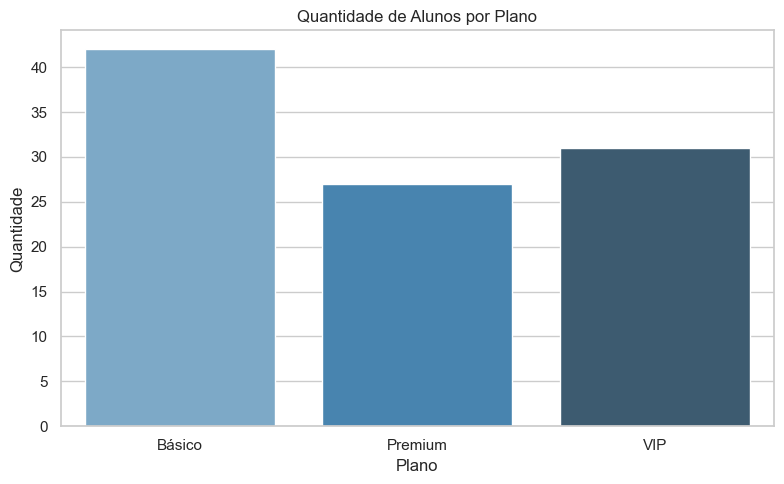

In [11]:
df_plano = pd.read_sql_query('''
SELECT plano, COUNT(*) AS quantidade
FROM alunos
GROUP BY plano
''', conn)

plt.figure(figsize=(8, 5))
sns.barplot(data=df_plano, x='plano', y='quantidade', palette='Blues_d')
plt.title('Quantidade de Alunos por Plano')
plt.xlabel('Plano')
plt.ylabel('Quantidade')
plt.tight_layout()
plt.show()


### 8. Gráfico de pizza: Distribuição dos objetivos dos alunos

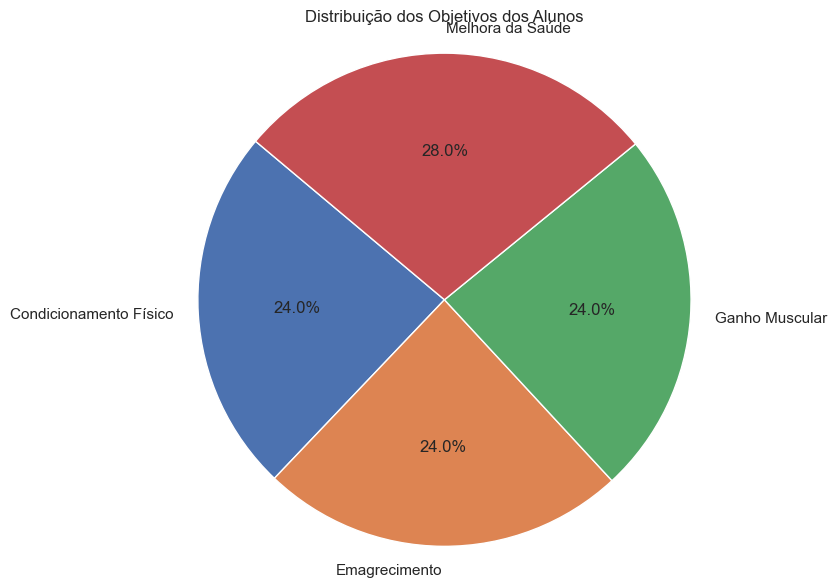

In [12]:
df_objetivo = pd.read_sql_query('''
SELECT objetivo, COUNT(*) AS total
FROM alunos
GROUP BY objetivo
''', conn)

plt.figure(figsize=(7, 7))
plt.pie(df_objetivo['total'], labels=df_objetivo['objetivo'], autopct='%1.1f%%', startangle=140)
plt.title('Distribuição dos Objetivos dos Alunos')
plt.axis('equal')
plt.show()

### 9. Gráfico de barras: Classes de avaliação

C:\Users\gonca\AppData\Local\Temp\ipykernel_2284\3734964057.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_avaliacao, x='avaliacao', y='total', palette='Set2')


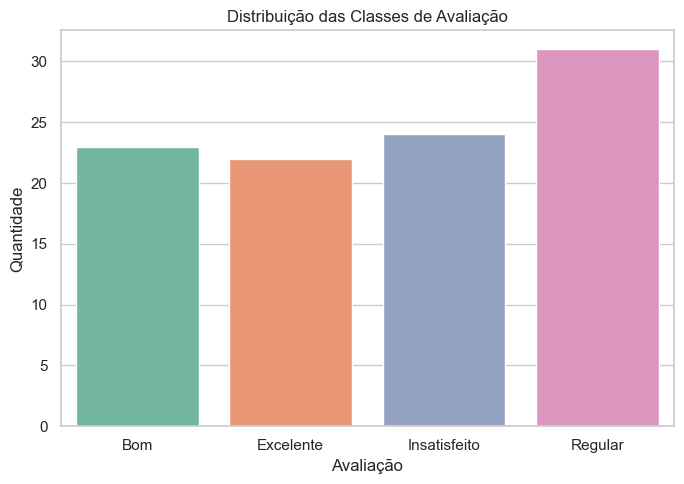

In [13]:
df_avaliacao = pd.read_sql_query('''
SELECT avaliacao, COUNT(*) AS total
FROM alunos
GROUP BY avaliacao
''', conn)

plt.figure(figsize=(7, 5))
sns.barplot(data=df_avaliacao, x='avaliacao', y='total', palette='Set2')
plt.title('Distribuição das Classes de Avaliação')
plt.xlabel('Avaliação')
plt.ylabel('Quantidade')
plt.tight_layout()
plt.show()

### 10. Histograma: Distribuição da quantidade de aulas realizadas

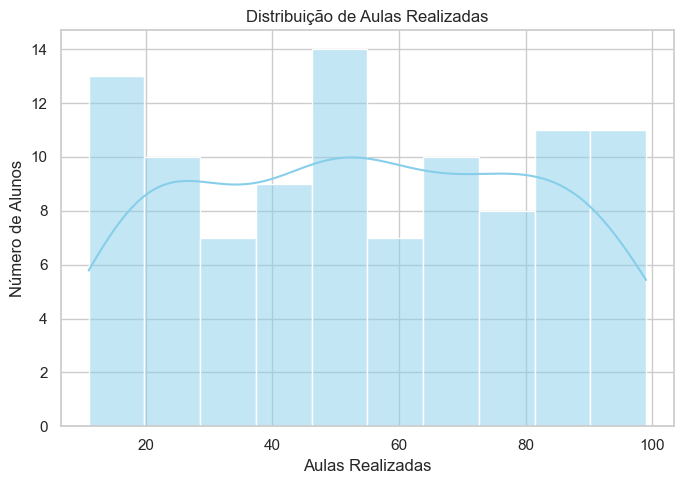

In [14]:
df_aulas = pd.read_sql_query('SELECT aulas_realizadas FROM alunos', conn)

plt.figure(figsize=(7, 5))
sns.histplot(df_aulas['aulas_realizadas'], bins=10, kde=True, color='skyblue')
plt.title('Distribuição de Aulas Realizadas')
plt.xlabel('Aulas Realizadas')
plt.ylabel('Número de Alunos')
plt.tight_layout()
plt.show()


### 11. Status de Pagamento dos Alunos

C:\Users\gonca\AppData\Local\Temp\ipykernel_2284\4035930523.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_pagamento, x='status_pagamento', y='total', palette='coolwarm')


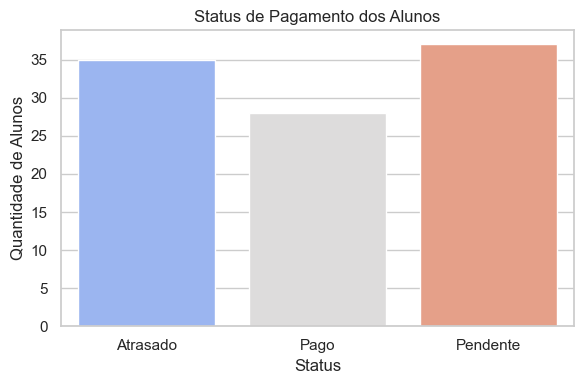

In [17]:
# 4. Gráfico de barras: Status de Pagamento
df_pagamento = pd.read_sql_query('''
SELECT status_pagamento, COUNT(*) AS total
FROM alunos
GROUP BY status_pagamento
''', conn)

plt.figure(figsize=(6, 4))
sns.barplot(data=df_pagamento, x='status_pagamento', y='total', palette='coolwarm')
plt.title('Status de Pagamento dos Alunos')
plt.xlabel('Status')
plt.ylabel('Quantidade de Alunos')
plt.tight_layout()
plt.show()

### 12. Distribuição de Aulas Realizadas por Tipo de Plano

C:\Users\gonca\AppData\Local\Temp\ipykernel_2284\1398624309.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_aulas_plano, x='plano', y='aulas_realizadas', palette='Set3')


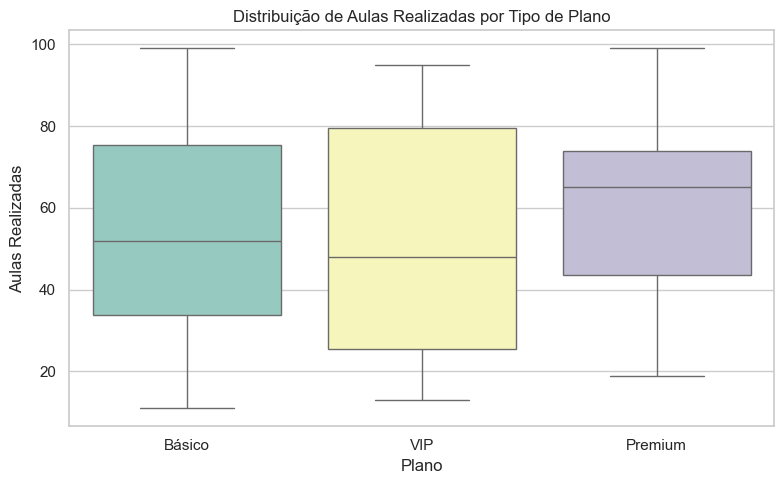

In [18]:
# Consulta: aulas realizadas por aluno e seu respectivo plano
df_aulas_plano = pd.read_sql_query('''
SELECT plano, aulas_realizadas
FROM alunos
''', conn)

# Gráfico de boxplot para ver a distribuição por plano
plt.figure(figsize=(8, 5))
sns.boxplot(data=df_aulas_plano, x='plano', y='aulas_realizadas', palette='Set3')
plt.title('Distribuição de Aulas Realizadas por Tipo de Plano')
plt.xlabel('Plano')
plt.ylabel('Aulas Realizadas')
plt.tight_layout()
plt.show()